In [ ]:
import torch
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

import numbers

In [ ]:
df: pd.DataFrame = pd.read_csv("./data/train.csv", index_col="Id")

In [ ]:
int_columns = []
float_columns = []
for x, y in df.iloc[0].items():
    print(type(y))
    # Note that isinstance(1, np.int64) is False because python ints are 
    # unbounded and np.int64 are 64 bit, python floats are actually 64 bits
    # isinstance(3.1, np.float64) is actually true.
    if isinstance(y, float):
        float_columns.append(x)
    elif isinstance(y, np.int64):
        int_columns.append(x)

In [ ]:
df[int_columns]

In [ ]:
#plt.scatter(df.YearBuilt, df.SalePrice)
for i, c in enumerate(int_columns):
    plt.plot(df[c], df.SalePrice, "o")
    plt.title(f"{i+1:02}. SalePrice w.r.t. {c}")
    plt.xlabel(c)
    plt.ylabel("SalePrice")
    plt.savefig(f"./plots/{i+1}_{c}.png")
    plt.show()

In [9]:
[c for c in int_columns if c.startswith("Gr")]

['GrLivArea']

In [12]:
(df.GrLivArea.min(), df.GrLivArea.max(), df.GrLivArea.mean())

(334, 5642, 1515.463698630137)

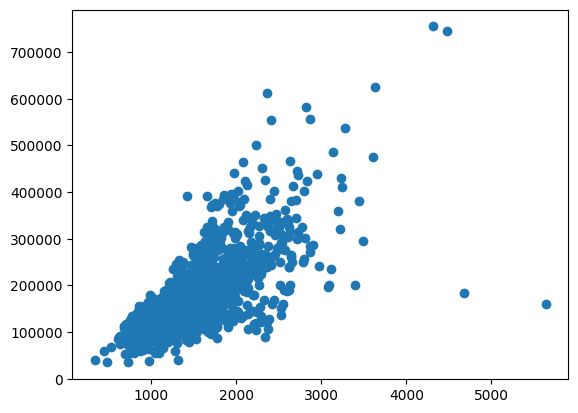

In [15]:
plt.plot(df.GrLivArea, df.SalePrice, "o")
y1 = df.SalePrice[df.GrLivArea < 1000].max()
y2 = df.SalePrice[(df.GrLivArea >= 1950) & (df.GrLivArea <= 2050)].min()

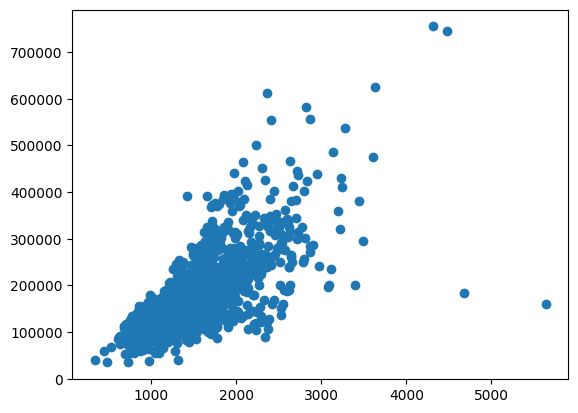

In [42]:
x = df.GrLivArea.min()
x_idx = df.GrLivArea.argmin()

plt.plot(df.GrLivArea, df.SalePrice, "o")

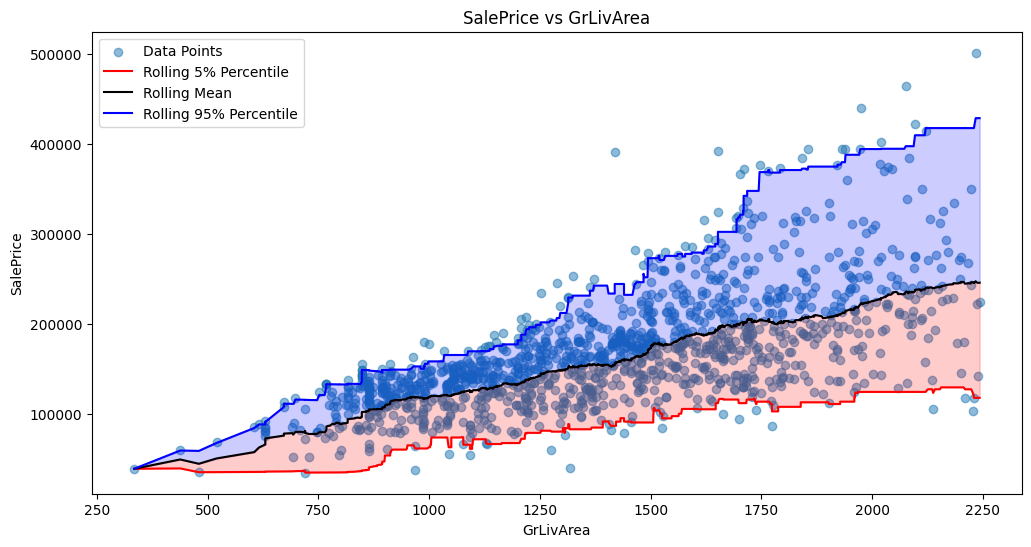

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have a DataFrame called 'df' with columns 'GrLivArea' and 'SalePrice'
df: pd.DataFrame = pd.read_csv("./data/train.csv", index_col="Id")
# Sort the DataFrame by GrLivArea
df = df.sort_values('GrLivArea')
df = df[df.GrLivArea < 2250]

# Compute rolling 5%, mean, and 95% percentiles
rolling_5pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.02)
rolling_mean = df['SalePrice'].rolling(len(df) // 10, min_periods=1).mean()
rolling_95pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.98)

# Plot the data
x = df.GrLivArea.min()
x_idx = df.GrLivArea.argmin()
plt.figure(figsize=(12, 6))
plt.scatter(df.GrLivArea, df.SalePrice, alpha=0.5, label='Data Points')

# Shade the area between the mean and the rolling 95% percentile in blue
plt.fill_between(df.GrLivArea, rolling_mean, rolling_95pct, color='blue', alpha=0.2)

# Shade the area between the mean and the rolling 5% percentile in red
plt.fill_between(df.GrLivArea, rolling_mean, rolling_5pct, color='red', alpha=0.2)

# Plot rolling 5%, mean, and 95% percentiles
plt.plot(df.GrLivArea, rolling_5pct, color='red', label='Rolling 5% Percentile')
plt.plot(df.GrLivArea, rolling_mean, color='black', label='Rolling Mean')
plt.plot(df.GrLivArea, rolling_95pct, color='blue', label='Rolling 95% Percentile')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.legend()
plt.show()

/var/folders/dq/z5syqybd1z96g4ny_n5nr9rc0000gn/T/ipykernel_1571/286024055.py:20: RuntimeWarning: overflow encountered in exp
  return A * np.exp(B * x)
/Users/danielsinkin/GitHub_private/kaggle/.venv/lib/python3.9/site-packages/scipy/optimize/_minpack_py.py:980: RuntimeWarning: overflow encountered in square
  cost = np.sum(infodict['fvec'] ** 2)
/var/folders/dq/z5syqybd1z96g4ny_n5nr9rc0000gn/T/ipykernel_1571/286024055.py:23: OptimizeWarning: Covariance of the parameters could not be estimated
  mean_params, mean_covariance = curve_fit(exponential_func, df.GrLivArea.values, rolling_mean.values)
/var/folders/dq/z5syqybd1z96g4ny_n5nr9rc0000gn/T/ipykernel_1571/286024055.py:24: OptimizeWarning: Covariance of the parameters could not be estimated
  pct5_params, pct5_covariance = curve_fit(exponential_func, df.GrLivArea.values, rolling_5pct.values)
/var/folders/dq/z5syqybd1z96g4ny_n5nr9rc0000gn/T/ipykernel_1571/286024055.py:25: OptimizeWarning: Covariance of the parameters could not be estim

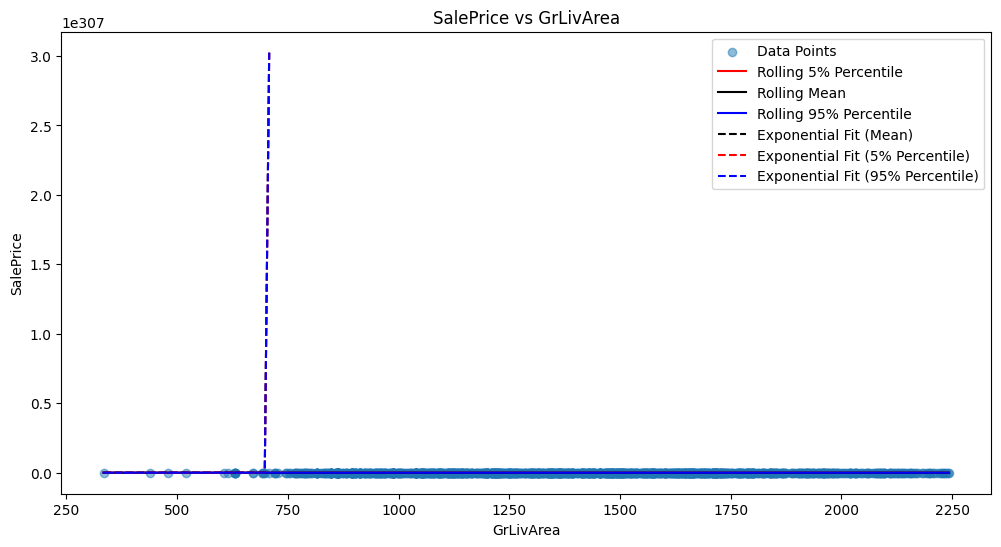

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Assuming you have a DataFrame called 'df' with columns 'GrLivArea' and 'SalePrice'
df: pd.DataFrame = pd.read_csv("./data/train.csv", index_col="Id")

# Sort the DataFrame by GrLivArea
df = df.sort_values('GrLivArea')
df = df[df.GrLivArea < 2250]

# Compute rolling 5%, mean, and 95% percentiles
rolling_5pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.02)
rolling_mean = df['SalePrice'].rolling(len(df) // 10, min_periods=1).mean()
rolling_95pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.98)

# Define exponential function
def exponential_func(x, A, B):
    return A * np.exp(B * x)

# Fit exponential function to rolling mean, 5% percentile, and 95% percentile
mean_params, mean_covariance = curve_fit(exponential_func, df.GrLivArea.values, rolling_mean.values)
pct5_params, pct5_covariance = curve_fit(exponential_func, df.GrLivArea.values, rolling_5pct.values)
pct95_params, pct95_covariance = curve_fit(exponential_func, df.GrLivArea.values, rolling_95pct.values)

# Plot the data
x = df.GrLivArea.min()
x_idx = df.GrLivArea.argmin()
plt.figure(figsize=(12, 6))
plt.scatter(df.GrLivArea, df.SalePrice, alpha=0.5, label='Data Points')

# Shade the area between the mean and the rolling 95% percentile in blue
plt.fill_between(df.GrLivArea, rolling_mean, rolling_95pct, color='blue', alpha=0.2)

# Shade the area between the mean and the rolling 5% percentile in red
plt.fill_between(df.GrLivArea, rolling_mean, rolling_5pct, color='red', alpha=0.2)

# Plot rolling 5%, mean, and 95% percentiles
plt.plot(df.GrLivArea, rolling_5pct, color='red', label='Rolling 5% Percentile')
plt.plot(df.GrLivArea, rolling_mean, color='black', label='Rolling Mean')
plt.plot(df.GrLivArea, rolling_95pct, color='blue', label='Rolling 95% Percentile')

# Plot exponential function fits
plt.plot(df.GrLivArea, exponential_func(df.GrLivArea, *mean_params), 'k--', label='Exponential Fit (Mean)')
plt.plot(df.GrLivArea, exponential_func(df.GrLivArea, *pct5_params), 'r--', label='Exponential Fit (5% Percentile)')
plt.plot(df.GrLivArea, exponential_func(df.GrLivArea, *pct95_params), 'b--', label='Exponential Fit (95% Percentile)')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.legend()
plt.show()

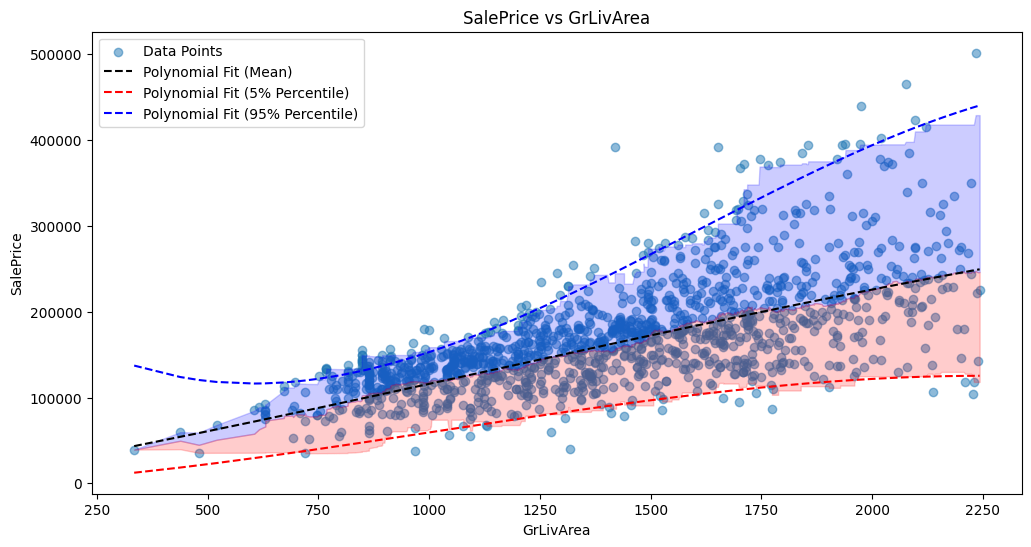

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Assuming you have a DataFrame called 'df' with columns 'GrLivArea' and 'SalePrice'
df: pd.DataFrame = pd.read_csv("./data/train.csv", index_col="Id")

# Sort the DataFrame by GrLivArea
df = df.sort_values('GrLivArea')
df = df[df.GrLivArea < 2250]

# Compute rolling 5%, mean, and 95% percentiles
rolling_5pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.02)
rolling_mean = df['SalePrice'].rolling(len(df) // 10, min_periods=1).mean()
rolling_95pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.98)

# Define polynomial function
def polynomial_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit polynomial function to rolling mean, 5% percentile, and 95% percentile
mean_params, mean_covariance = curve_fit(polynomial_func, df.GrLivArea.values, rolling_mean.values)
pct5_params, pct5_covariance = curve_fit(polynomial_func, df.GrLivArea.values, rolling_5pct.values)
pct95_params, pct95_covariance = curve_fit(polynomial_func, df.GrLivArea.values, rolling_95pct.values)

# Plot the data
x = df.GrLivArea.min()
x_idx = df.GrLivArea.argmin()
plt.figure(figsize=(12, 6))
plt.scatter(df.GrLivArea, df.SalePrice, alpha=0.5, label='Data Points')

# Shade the area between the mean and the rolling 95% percentile in blue
plt.fill_between(df.GrLivArea, rolling_mean, rolling_95pct, color='blue', alpha=0.2)

# Shade the area between the mean and the rolling 5% percentile in red
plt.fill_between(df.GrLivArea, rolling_mean, rolling_5pct, color='red', alpha=0.2)

# Plot rolling 5%, mean, and 95% percentiles
# plt.plot(df.GrLivArea, rolling_5pct, color='red', label='Rolling 5% Percentile')
# plt.plot(df.GrLivArea, rolling_mean, color='black', label='Rolling Mean')
# plt.plot(df.GrLivArea, rolling_95pct, color='blue', label='Rolling 95% Percentile')

# Plot polynomial function fits
plt.plot(df.GrLivArea, polynomial_func(df.GrLivArea, *mean_params), 'k--', label='Polynomial Fit (Mean)')
plt.plot(df.GrLivArea, polynomial_func(df.GrLivArea, *pct5_params), 'r--', label='Polynomial Fit (5% Percentile)')
plt.plot(df.GrLivArea, polynomial_func(df.GrLivArea, *pct95_params), 'b--', label='Polynomial Fit (95% Percentile)')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.legend()
plt.show()

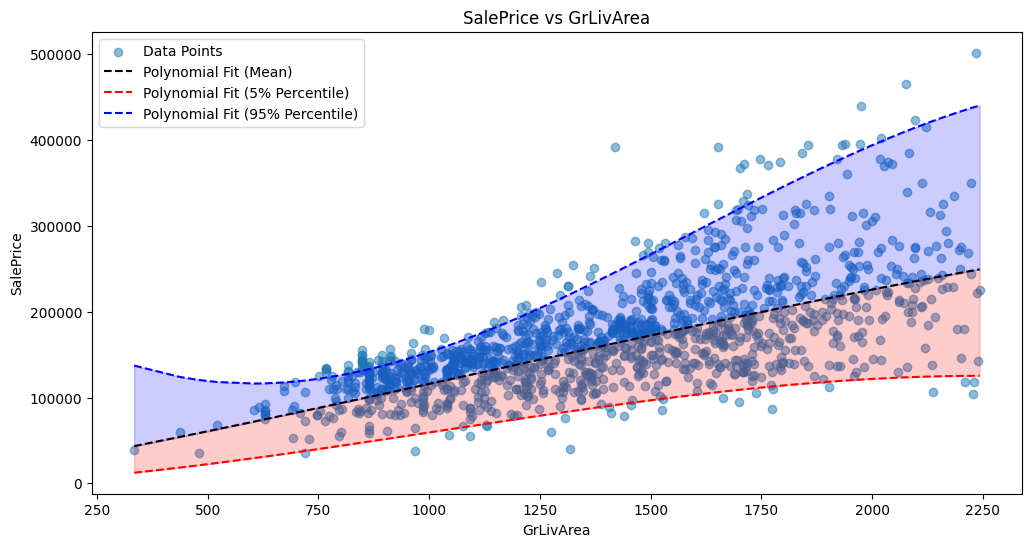

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

# Assuming you have a DataFrame called 'df' with columns 'GrLivArea' and 'SalePrice'
df: pd.DataFrame = pd.read_csv("./data/train.csv", index_col="Id")

# Sort the DataFrame by GrLivArea
df = df.sort_values('GrLivArea')
df = df[df.GrLivArea < 2250]

# Compute rolling 5%, mean, and 95% percentiles
rolling_5pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.02)
rolling_mean = df['SalePrice'].rolling(len(df) // 10, min_periods=1).mean()
rolling_95pct = df['SalePrice'].rolling(len(df) // 10, min_periods=1).quantile(0.98)

# Define polynomial function
def polynomial_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit polynomial function to rolling mean, 5% percentile, and 95% percentile
mean_params, mean_covariance = curve_fit(polynomial_func, df.GrLivArea.values, rolling_mean.values)
pct5_params, pct5_covariance = curve_fit(polynomial_func, df.GrLivArea.values, rolling_5pct.values)
pct95_params, pct95_covariance = curve_fit(polynomial_func, df.GrLivArea.values, rolling_95pct.values)

# Plot the data
x = df.GrLivArea.min()
x_idx = df.GrLivArea.argmin()
plt.figure(figsize=(12, 6))
plt.scatter(df.GrLivArea, df.SalePrice, alpha=0.5, label='Data Points')

# Plot rolling 5%, mean, and 95% percentiles
# plt.plot(df.GrLivArea, rolling_5pct, color='red', label='Rolling 5% Percentile')
# plt.plot(df.GrLivArea, rolling_mean, color='black', label='Rolling Mean')
# plt.plot(df.GrLivArea, rolling_95pct, color='blue', label='Rolling 95% Percentile')

# Shade the area between the mean and the 95% percentile fit in blue
plt.fill_between(df.GrLivArea, polynomial_func(df.GrLivArea, *mean_params), polynomial_func(df.GrLivArea, *pct95_params), color='blue', alpha=0.2)

# Shade the area between the mean and the 5% percentile fit in red
plt.fill_between(df.GrLivArea, polynomial_func(df.GrLivArea, *mean_params), polynomial_func(df.GrLivArea, *pct5_params), color='red', alpha=0.2)

# Plot polynomial function fits
plt.plot(df.GrLivArea, polynomial_func(df.GrLivArea, *mean_params), 'k--', label='Polynomial Fit (Mean)')
plt.plot(df.GrLivArea, polynomial_func(df.GrLivArea, *pct5_params), 'r--', label='Polynomial Fit (5% Percentile)')
plt.plot(df.GrLivArea, polynomial_func(df.GrLivArea, *pct95_params), 'b--', label='Polynomial Fit (95% Percentile)')

plt.xlabel('GrLivArea')
plt.ylabel('SalePrice')
plt.title('SalePrice vs GrLivArea')
plt.legend()
plt.show()